# Focal Loss
Learn Focal Loss from the [link](https://amaarora.github.io/2020/06/29/FocalLoss.html). Then I display my understanding.

It is difficult to make an AI model to focus on the 'hard-to-classfiy' examples. Focal Loss implements this in a geniuse and amazing way! The amazing Focal Loss is defined as:
$$ FL(p_t) = -(1-p_t)^\gamma \log(p_t)$$
For a binary classification model, let $p$ denoting the predicted probablity of label $y=1$. Then $p_t$ is defined as 
$$ p_t = \left\{ 
           \begin{array}{lr}
              p, & \text{for } y=1,\\
              1-p, & \text{for } y=0.
           \end{array} \right.
$$
For $\gamma=0$, this is just the cross-entroy loss.
Let me explain the reason that Focal Loss can make the model focus on the 'hard-to-classify' examples.
Firstly, let us plot the curves of Focal Loss for different $\gamma$.

In [32]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
def focal_loss(pt, gamma):
    return -(1-pt)**gamma*np.log(pt)

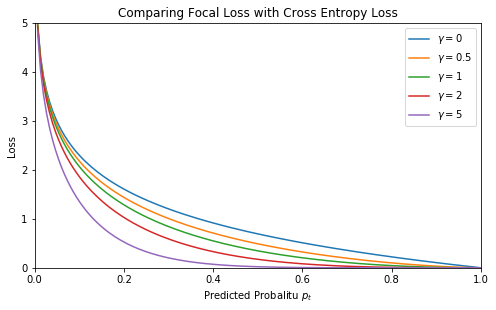

In [47]:
pt = np.linspace(0, 1, 150)
plt.figure(figsize=(8,4.5))
plt.ylim(0,5)
plt.xlim(0,1)
for gamma in [0, 0.5, 1, 2, 5]:
    plt.plot(pt, focal_loss(pt, gamma), label=f'$\gamma={gamma}$')
plt.title('Comparing Focal Loss with Cross Entropy Loss');
plt.legend();
plt.xlabel('Predicted Probalitu $p_t$');
plt.ylabel('Loss');

We know that the different training samples effect the model by the absolute values of their slopes of the loss. And from the graph above, we find that as $\gamma$ increasing, the loss curves becomes steeper at smaller $p_t$ and flatter at the bigger $p_t$. So by using Focal Loss with non-zero $\gamma$, the effects of the samples with large $p_t$ (easily-classified ones) become negaligible faster than in the case using cross-entropy loss!